# Create Participant Embeddings with t-SNE

## Overview
This is a Jupyter Notebook that contains a model to learn embeddings, or low-dimensional representations, of the participants in the CTS and to visualize their relationships with each other. The notebook contains multiple cells that can be executed independently. 



###### By: Kingson Man, PhD, Department of Applied AI and Data Science, City of Hope
###### Funded by NIH Grant \#3U01CA199277-08S2  

In [1]:
# import necessary libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization

# show plots inline
%matplotlib inline

# Data Loading and Exploration

In this section, we load the survey data from a CSV file using pandas `read_csv()` method. We then explore the data to check for any missing values, outliers, or unexpected values. 

We start by importing the necessary libraries for data manipulation and analysis (`pandas`), numerical operations (`numpy`), and data visualization (`matplotlib`). We also set the `matplotlib` backend to display plots inline using the `%matplotlib inline` magic command.

Next, we read in the CSV file containing survey data using pandas `read_csv()` method. The file is located in the local directory and is named `surveydata_ai_ml.csv`. We specify the encoding as `unicode_escape` to handle any special characters that may be present in the file. We also set the `low_memory` parameter to `False` to ensure that pandas reads the entire file into memory at once.

We then display the first 10 rows of the dataframe using the `head()` method of pandas dataframe. This is useful to quickly inspect the data and check if it has been loaded correctly.

We use the `describe()` method of pandas dataframe to generate descriptive statistics of the dataframe. This method provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN values. The resulting output includes count, mean, standard deviation, minimum, maximum, and the quartiles of the data. This is useful to quickly inspect the data and check if there are any outliers or unexpected values.

We also calculate the proportion of missing values (NaNs) in each column of the dataframe. This is useful to identify columns with a high proportion of missing values that may need to be dropped or imputed.

Finally, we filter for only the participants that have completed all questionnaires. This is useful to remove incomplete data and ensure that the remaining data is suitable for analysis. The resulting dataframe is stored in the variable `df_qnr_all`.


In [2]:
# In this cell, we read in a CSV file containing survey data using pandas read_csv() method. 
# The file is located in the local directory and is named 'surveydata_ai_ml.csv'. 
# We specify the encoding as 'unicode_escape' to handle any special characters that may be present in the file. 
# We also set the 'low_memory' parameter to False to ensure that pandas reads the entire file into memory at once.
# The resulting dataframe is stored in the variable 'df'.
df = pd.read_csv('surveydata_ai_ml.csv', encoding='unicode_escape', low_memory=False)

In [ ]:
# In this cell, we display the first 10 rows of the dataframe 'df' that we created in cell 0. 
# We use the 'head()' method of pandas dataframe to display the first 10 rows. 
# This is useful to quickly inspect the data and check if it has been loaded correctly.
df.head(10)

In [4]:
# In this cell, we use the 'describe()' method of pandas dataframe to generate descriptive statistics of the dataframe 'df' that we created in cell 0. 
# This method provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN values.
# The resulting output includes count, mean, standard deviation, minimum, maximum, and the quartiles of the data.
# This is useful to quickly inspect the data and check if there are any outliers or unexpected values.
df.describe()

,participant_key,ses_quartile_ind,hysterectomy_ind,bilateral_mastectomy_ind,bilateral_oophorectomy_ind,age_at_baseline,participant_race,dad_race,mom_race,menarche_age,...,cannabis_reason_sleep_q6,cannabis_reason_relax_q6,cannabis_reason_other_q6,medi_cannabis_as_rx_med_q6,happiness_q6,recent_colonoscopy_q6,recent_sigmoidoscopy_q6,age_recent_colonoscopy_q6,age_recent_sigmoidoscopy_q6,recent_chest_xray_q6
count,1.251200e+05,122990.000000,125120.000000,125120.000000,125120.000000,125120.000000,125120.000000,125120.000000,125120.000000,123199.000000,...,19923.000000,19923.000000,19923.000000,19923.000000,37714.000000,37470.000000,37470.000000,33155.000000,22277.000000,37464.000000
mean,8.356656e+06,3.187869,0.290857,0.008088,0.184815,53.462140,1.331570,1.287684,1.289202,5.523470,...,0.290268,0.323847,0.337550,0.324851,1.322082,1.539525,2.266080,55.295702,16.151995,2.628310
std,9.623240e+05,0.878189,0.454159,0.089571,0.388149,14.587308,1.022929,0.991415,0.992520,1.459313,...,0.660546,0.719406,0.741819,0.717206,1.929186,0.922046,1.166938,25.582661,27.884369,2.978946
min,6.619946e+06,1.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,-88.000000
25%,7.544400e+06,3.000000,0.000000,0.000000,0.000000,43.000000,1.000000,1.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,53.000000,0.000000,3.000000
50%,8.375700e+06,3.000000,0.000000,0.000000,0.000000,52.000000,1.000000,1.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,65.000000,0.000000,3.000000
75%,9.184982e+06,4.000000,1.000000,0.000000,0.000000,64.000000,1.000000,1.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,71.000000,45.000000,3.000000
max,9.999991e+06,4.000000,1.000000,1.000000,1.000000,104.000000,6.000000,6.000000,6.000000,10.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,110.000000,96.000000,4.000000


In [5]:
# In this cell, we display the column names of the dataframe 'df' that we created in cell 2. 
# We use the 'columns' attribute of pandas dataframe to display the column names. 
# This is useful to quickly inspect the column names and check if they have been loaded correctly.
df.columns

Index(['participant_key', 'date_of_birth_dt', 'date_of_death_dt',
       'cause_of_death_cde', 'cause_of_death_dsc', 'qnr_1_fill_dt',
       'qnr_2_fill_dt', 'qnr_3_fill_dt', 'qnr_4_fill_dt', 'qnr_4_mini_fill_dt',
       ...
       'cannabis_reason_sleep_q6', 'cannabis_reason_relax_q6',
       'cannabis_reason_other_q6', 'medi_cannabis_as_rx_med_q6',
       'happiness_q6', 'recent_colonoscopy_q6', 'recent_sigmoidoscopy_q6',
       'age_recent_colonoscopy_q6', 'age_recent_sigmoidoscopy_q6',
       'recent_chest_xray_q6'],
      dtype='object', length=1229)

In [ ]:
# We filter for only the participants that have completed all questionnaires. This cell drops all rows from the dataframe 'df' that have missing values in any of the columns 'qnr_1_fill_dt', 'qnr_2_fill_dt', 'qnr_3_fill_dt', 'qnr_4_fill_dt', 'qnr_5_fill_dt', and 'qnr_6_fill_dt'. The resulting dataframe is stored in the variable 'df_qnr_all'. This is useful to remove incomplete data and ensure that the remaining data is suitable for analysis.
df_qnr_all = df.dropna(subset=['qnr_1_fill_dt','qnr_2_fill_dt','qnr_3_fill_dt','qnr_4_fill_dt', 'qnr_5_fill_dt','qnr_6_fill_dt',], how='any')
df_qnr_all

In [7]:
# This cell calculates the proportion of missing values (NaNs) in each column of the dataframe 'df_qnr_all' that we created in the cell above. 
# The resulting output is a pandas series that contains the proportion of NaNs in each column.

# calculate the proportion of NaNs in each column of the dataframe 'df_qnr_all'
df_na_prop = df_qnr_all.isna().mean()

# display the resulting output
df_na_prop

participant_key                0.000000
date_of_birth_dt               0.000000
date_of_death_dt               0.995865
cause_of_death_cde             0.839234
cause_of_death_dsc             0.995828
                                 ...   
recent_colonoscopy_q6          0.000000
recent_sigmoidoscopy_q6        0.000000
age_recent_colonoscopy_q6      0.122969
age_recent_sigmoidoscopy_q6    0.441055
recent_chest_xray_q6           0.000000
Length: 1229, dtype: float64

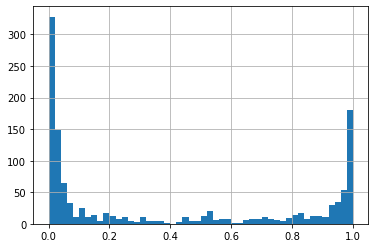

In [8]:
# histogram of features by proportion of NA

# This code generates a histogram of the proportion of missing values (NaNs) in each column of the dataframe 'df_qnr_all' that we created in cell 7. 
# The histogram is generated using the 'hist()' method of pandas series. We pass the 'bins' parameter to specify the number of bins in the histogram. 
# The resulting histogram shows the distribution of the proportion of missing values across all columns of the dataframe.

df_na_prop.sort_values().hist(bins=50)


In [9]:
# This line of code selects only the features that are free of missing values (NaNs) from the dataframe 'df_na_prop' that we created in cell 8. 
# We use the 'index' attribute of pandas series to get the column names of the dataframe. 
# We then convert the resulting pandas index object to a list using the 'tolist()' method of pandas index object. 
# The resulting list contains the column names of the dataframe that are free of missing values (NaNs).
features_full = df_na_prop[df_na_prop == 0].index.tolist()

features_full

['participant_key',
 'date_of_birth_dt',
 'qnr_1_fill_dt',
 'qnr_2_fill_dt',
 'qnr_3_fill_dt',
 'qnr_4_fill_dt',
 'qnr_5_fill_dt',
 'qnr_6_fill_dt',
 'hysterectomy_ind',
 'bilateral_mastectomy_ind',
 'bilateral_oophorectomy_ind',
 'age_at_baseline',
 'participant_race',
 'dad_race',
 'mom_race',
 'nih_ethnic_cat',
 'nih_race_cat',
 'teacher_type',
 'preg_curr_q1',
 'meno_ht_statcomb',
 'provera_dose_q1',
 'nsaid_totyrs',
 'nsaid_days',
 'brca_selfsurvey',
 'brca_famhis',
 'endoca_famhis',
 'ovryca_famhis',
 'cervca_famhis',
 'lungca_famhis',
 'leuk_famhis',
 'hodg_famhis',
 'thyrca_famhis',
 'colnca_famhis',
 'meln_famhis',
 'prosca_famhis',
 'alchl_analyselig',
 'waisthip_elig',
 'oralcntr_usebyq3',
 'htcomb_4yrs',
 'diet_analyselig',
 'strenuous_hrs_per_wk_q6',
 'moderate_hrs_per_wk_q6',
 'osteoa_diag_q6',
 'rheuma_diag_q6',
 'asthma_diag_q6',
 't2d_diag_q6',
 'dvt_diag_q6',
 'depres_diag_q6',
 'cholesterol_diag_q6',
 'dbp_diag_q6',
 'inflammatorybowel_diag_q6',
 'kidndis_diag_q6',
 

In [10]:
# In this cell, we select only the features that are free of missing values (NaNs) from the dataframe 'df_qnr_all' that we created in cell 7. 
# The resulting dataframe is stored in the variable 'df_sel'. This is useful to remove incomplete data and ensure that the remaining data is suitable for analysis.

# select only the features that are free of missing values (NaNs) from the dataframe 'df_qnr_all'
df_sel = df_qnr_all[features_full]


In [ ]:
# In this cell, we exclude the first 8 columns from the dataframe 'df_sel' that we created in cell 11. These columns contain metadata for the dates of completion of the questionnaires and are not relevant for our analysis. 
# We create a new dataframe 'df_sel2' that contains only the columns that are relevant for our analysis. 
# The resulting dataframe is stored in the variable 'df_sel2'.

# exclude the first 8 columns from the dataframe 'df_sel' that we created in cell 11, which are metadata for the dates of completion of the questionnaires
df_sel2 = df_sel.iloc[:,8:]

# display the resulting dataframe 'df_sel2'
df_sel2

In [ ]:
# This cell encodes categorical columns in the dataframe 'df_sel2' to numeric values using the 'cat.codes' method of pandas dataframe. 
# This is useful to convert categorical data to a format that can be used for machine learning algorithms. 
# The resulting dataframe is stored in the variable 'df_sel2'.

# encode 'nih_ethnic_cat' column to numeric
df_sel2['nih_ethnic_cat'] = df_sel2['nih_ethnic_cat'].astype('category').cat.codes

# encode 'nih_race_cat' column to numeric
df_sel2['nih_race_cat'] = df_sel2['nih_race_cat'].astype('category').cat.codes

# encode 'teacher_type' column to numeric
df_sel2['teacher_type'] = df_sel2['teacher_type'].astype('category').cat.codes

# encode 'nsaid_totyrs' column to numeric
df_sel2['nsaid_totyrs'] = df_sel2['nsaid_totyrs'].astype('category').cat.codes

# encode 'nsaid_days' column to numeric
df_sel2['nsaid_days'] = df_sel2['nsaid_days'].astype('category').cat.codes

# encode 'brca_selfsurvey' column to numeric
df_sel2['brca_selfsurvey'] = df_sel2['brca_selfsurvey'].astype('category').cat.codes

# display the resulting dataframe 'df_sel2'
df_sel2

In [ ]:
# This cell replaces all values in the dataframe 'df_sel2' that have the special null code -88 with the mode of the column. 
# This is useful to replace missing values with the most common value in the column, which is a common strategy in data preprocessing. 
# The resulting dataframe is stored in the variable 'df_sel3'.

# find all values that have the special null code -88 and replace them with the mode of the column
df_sel3 = df_sel2.replace(-88, df_sel2.mode().iloc[0])

# display the resulting dataframe 'df_sel3'
df_sel3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb57067c2b0>,
      dtype=object)

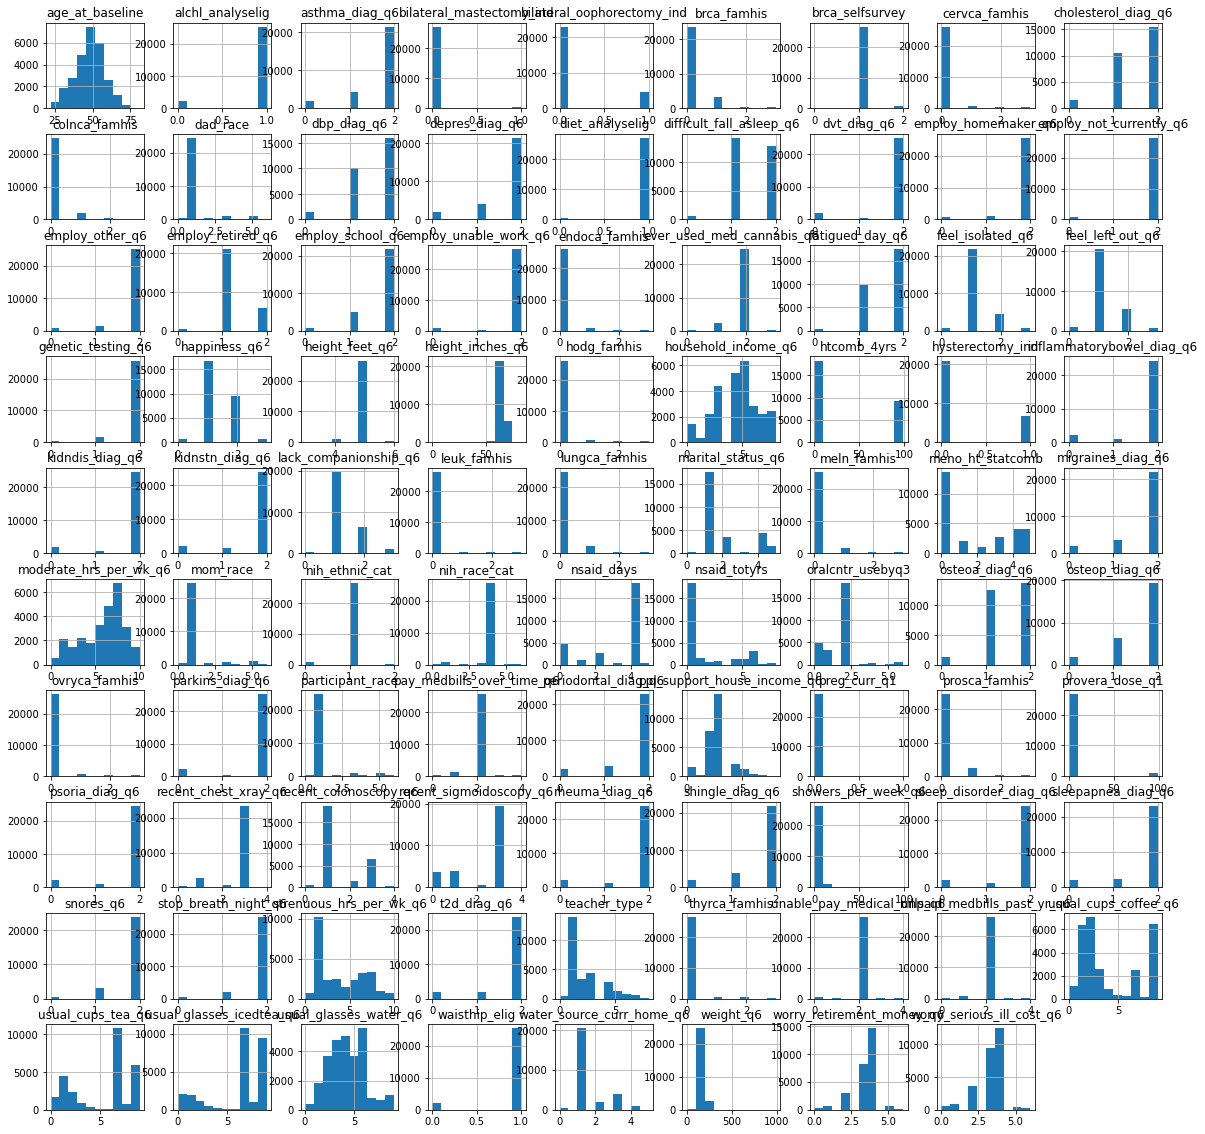

In [14]:
# This cell plots histograms of all features in the dataframe 'df_sel3' that we created in cell 14. 
# The resulting histograms are displayed using the 'hist()' method of pandas dataframe. 
# We pass the 'figsize' parameter to specify the size of the resulting figure.
# We inspect the histograms for their distribution of values and check if there are any outliers or unexpected values.

# plot histograms of all features
df_sel3.hist(figsize=(20,20))

In [ ]:
# In this cell, we create a new dataframe 'df_sel3' that is a random sample of 10% of the rows from the dataframe 'df_sel3' that we created in cell 14. 
# This is because the following step, t-SNE, grows with O(n^2) time complexity, where n is the number of rows in the dataframe. Time complexity refers to rate of increase in the time taken to run the algorithm as the number of rows in the dataframe increases. A time complexity of O(n^2) ("big-oh of n-squared") means that, in the worst case, the time taken to run the algorithm increases quadratically with the number of rows in the dataframe, which is very demanding.
# We use the 'sample()' method of pandas dataframe to randomly sample the rows. 
# We pass the 'frac' parameter to specify the fraction of rows to sample, which is set to 0.1 or 10% in this case. 
# The resulting dataframe is stored in the variable 'df_sel3'.

# for computational reproducibility; set seed so that all subsequent "random" operations are deterministic and can be re-created in the future
np.random.seed(52)

df_sel3 = df_sel3.sample(frac=.1)
df_sel3

Text(0.5, 1.0, 'without cluster labels')

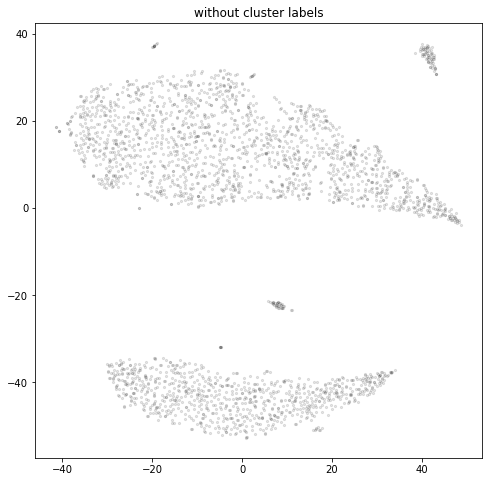

In [26]:
# This cell performs t-SNE (t-Distributed Stochastic Neighbor Embedding) on the dataframe 'df_sel3' that we created in cell 14. 
# t-SNE is a dimensionality reduction technique that is often used for visualizing high-dimensional data in a lower-dimensional space. It is often used to visualize the original, high-dimensional data, in a 2D or 3D space for ease of interpretation. Data points (representing participants) that are close to each other in the original, high-dimensional space are also close to each other in the lower-dimensional space.
# The resulting 2D embedding is plotted using the 'scatter()' method of matplotlib. 
# We pass the 's' parameter to specify the size of the markers, 'c' parameter to specify the color of the markers, and 'alpha' parameter to specify the transparency of the markers.

# imports
from sklearn import manifold
from matplotlib import cm
import matplotlib.pyplot as plt

# rename data to follow conventions
X = df_sel3.astype('float')

# for computational reproducibility; set seed so that all subsequent "random" operations are deterministic and can be re-created in the future
np.random.seed(52)

# perform t-SNE on the dataframe 'X'
""" 
Explanation of parameters:
- `n_components`: This parameter specifies the number of dimensions in the embedded space. In this case, we set it to 2 to create a 2D embedding.
- `method`: This parameter specifies the method used to compute the embedding. In this case, we use the Barnes-Hut algorithm, which is a faster approximation of the exact t-SNE algorithm.
- `init`: This parameter specifies the initialization of the embedding, as a first attempt at finding patterns in the data. In this case, we use a random initialization. An alternative is to use a PCA initialization, which is often used to find linear relationships for high-dimensional data.
- `perplexity`: This parameter controls the balance between preserving local and global structure in the data. A higher perplexity value results in more emphasis on preserving global structure. In this case, we set it to 50.
- `metric`: This parameter specifies the distance metric used to compute pairwise distances between data points. In this case, we use the Euclidean distance metric.
"""
X_embedded = manifold.TSNE(n_components=2, method='barnes_hut', init='random', perplexity=50, metric='euclidean').fit_transform(X)

# plot the resulting 2D embedding using the 'scatter()' method of matplotlib
"""
Explanation of parameters for plotting:
- `s`: This parameter specifies the size of the markers in the scatter plot. In this case, we set it to 5.
- `c`: This parameter specifies the color of the markers in the scatter plot. In this case, we set it to black.
- `alpha`: This parameter specifies the transparency of the markers in the scatter plot. In this case, we set it to 0.1.
"""
fig, axes = plt.subplots(ncols=1, figsize=(8,8))
axes.scatter(X_embedded[:,0], X_embedded[:,1], s=5, c='black', alpha=.1)
axes.set_title('without cluster labels')


Success! We see that the CTS dataset clusters very nicely onto a low dimensional manifold; that is, we learned a 2-dimensional embedding representation of the original high-dimensional dataset of the participant's survey answers. 

Next, we automatically distinguish individual clusters by colorizing them.

In [27]:
# This cell performs HDBSCAN clustering on the 2D embedding of the CTS dataset that we created in cell 17 using t-SNE. 

# The resulting cluster labels are stored in the variable 'labels_hdbs'.

# import the necessary libraries for KMeans and DBSCAN clustering
from sklearn.cluster import KMeans, DBSCAN

# import the HDBSCAN library for clustering
!pip install hdbscan
import hdbscan

# create an HDBSCAN clustering object with min_cluster_size=5
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)

# perform HDBSCAN clustering on the 2D embedding 'X_embedded' that we created in cell 17
labels_hdbs = hdbscan_clusterer.fit_predict(X_embedded)

Text(0.5, 1.0, 'with HDBSCAN cluster labels')

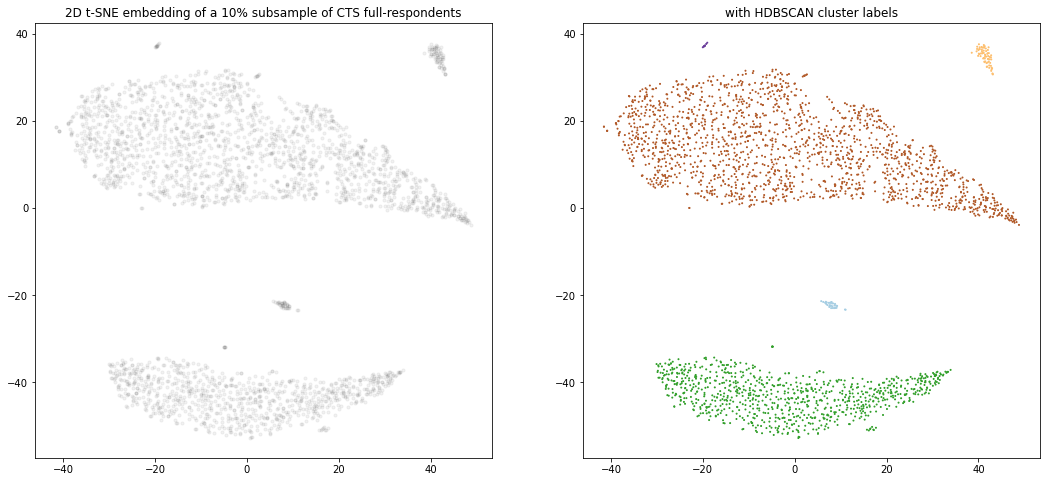

In [28]:
# This cell creates a figure with two subplots. The first subplot shows the 2D t-SNE embedding of a 10% subsample of the CTS full-respondents dataset that we created in cell 16. 
# The second subplot shows the same 2D t-SNE embedding, but with HDBSCAN cluster labels. 

# imports
import matplotlib.pyplot as plt

# create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(18,8))

# plot the 2D t-SNE embedding of a 10% subsample of the CTS full-respondents dataset in the first subplot
"""
Explanation of parameters for plotting:
- `s`: This parameter specifies the size of the markers in the scatter plot. In this case, we set it to 10.
- `c`: This parameter specifies the color of the markers in the scatter plot. In this case, we set it to black.
- `alpha`: This parameter specifies the transparency of the markers in the scatter plot. In this case, we set it to 0.05.
"""
axes[0].scatter(X_embedded[:,0], X_embedded[:,1], s=10, c='black', alpha=.05)
axes[0].set_title('2D t-SNE embedding of a 10% subsample of CTS full-respondents')

# plot the 2D t-SNE embedding of a 10% subsample of the CTS full-respondents dataset with HDBSCAN cluster labels in the second subplot
"""
Explanation of parameters for plotting:
- `s`: This parameter specifies the size of the markers in the scatter plot. In this case, we set it to 1.
- `c`: This parameter specifies the color of the markers in the scatter plot. In this case, we set it to the HDBSCAN cluster labels.
- `cmap`: This parameter specifies the colormap used to map the cluster labels to colors. In this case, we use the 'Paired' colormap.
"""
axes[1].scatter(X_embedded[:,0], X_embedded[:,1], s=1, c=labels_hdbs, cmap='Paired')
axes[1].set_title('with HDBSCAN cluster labels')

Now we seek explainability of the clusters identified in the low-dimensional embedding. We train a random forest classifier to learn the differences between clusters, and use the SHAP values for this machine learning model to identify the key features distinguishing between clusters.

Accuracy: 0.99


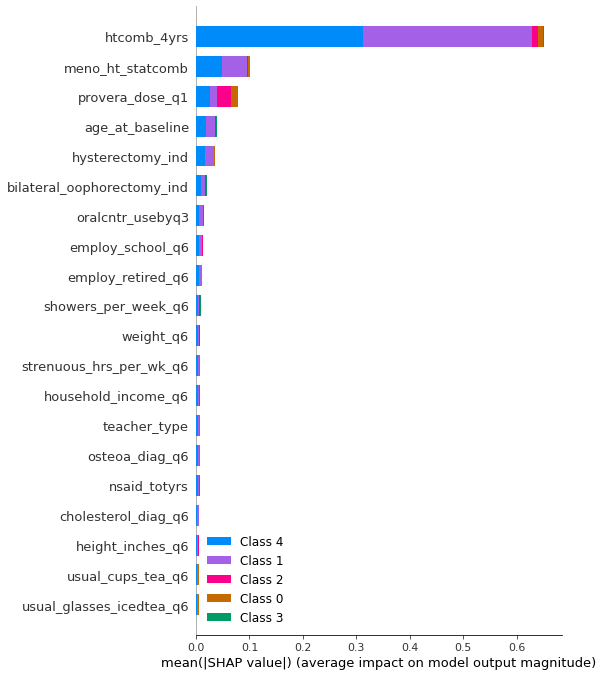

In [31]:
# Install the required packages
!pip install scikit-learn shap

# Import the necessary libraries
import shap
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the data
X = df_sel3.astype('float')
y = labels_hdbs

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Test the classifier on the test set
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Plot the feature importances
shap.summary_plot(shap_values, X_test, feature_names=df_sel3.columns.tolist())


We see above that the features of highest importance to determining clusters assignment are related to hormone therapy, which may be a proxy for pre- or post-menopause, which is itself a proxy for age. 

Each class represents a color-coded cluster to which a participant was grouped, based on their t-SNE embeddings and nearest neighbors in the embedding space. 

Therefore, as a follow-up question, we explore whether the clusters significantly differ in terms of age.

In [59]:
# This cell reports the mean age_at_baseline for each cluster identified in the previous cells. 
# We group the 'df_sel3' dataframe by the HDBSCAN cluster labels 'labels_hdbs', and calculate the mean of the 'age_at_baseline' column for each group.

# group the 'df_sel3' dataframe by the HDBSCAN cluster labels 'labels_hdbs', and calculate the mean of the 'age_at_baseline' column for each group
df_sel3.groupby(labels_hdbs)['age_at_baseline'].mean()
# report the mean age_at_baseline for each cluster
df_sel3.groupby(labels_hdbs)['age_at_baseline'].mean()

0    51.137931
1    48.350000
2    57.875000
3    52.413948
4    52.727273
5    45.567978
Name: age_at_baseline, dtype: float64

In [58]:
# This cell runs an ANOVA test to compare the mean age_at_baseline across clusters. 
# We use the `f_oneway()` function from the `scipy.stats` module to perform the ANOVA test. 
# The function takes in the age_at_baseline values for each cluster as separate arguments, and returns the F-statistic and p-value for the test.
# The ANOVA test is used to determine whether there are any statistically significant differences between the mean age_at_baseline values for the different clusters.

from scipy.stats import f_oneway

# run the ANOVA test on the age_at_baseline values for each cluster
f_oneway(df_sel3['age_at_baseline'][labels_hdbs==0], df_sel3['age_at_baseline'][labels_hdbs==1], df_sel3['age_at_baseline'][labels_hdbs==2], df_sel3['age_at_baseline'][labels_hdbs==3], df_sel3['age_at_baseline'][labels_hdbs==4], df_sel3['age_at_baseline'][labels_hdbs==5])

F_onewayResult(statistic=69.4782229268569, pvalue=1.331445549375723e-68)

From the ANOVA result we can conclude that age is a highly significant (p < 1e-67) factor distinguishing clusters from each other. 